In [50]:
import pathlib
import pandas as pd
from sklearn.model_selection import train_test_split

In [51]:
base_dir = pathlib.Path('./kaggle')
train_dir = base_dir / 'train'
test_dir = base_dir / 'test'
val_dir = base_dir / 'val'

In [52]:
def create_dataset_df(directory: pathlib.Path):
    """
    주어진 디렉토리 내의 모든 .jpg 이미지 파일 경로와
    해당 이미지의 레이블(부모 폴더 이름)을 찾아 DataFrame으로 만듭니다.
    """
    image_paths = []
    labels = []

    # 디렉토리 내의 모든 하위 폴더에서 .jpg 파일을 찾습니다.
    # .glob('*/*.jpg')는 모든 하위폴더('*')의 모든 jpg파일('*')을 찾습니다.
    for image_path in sorted(directory.glob('*/*.jpg')):
        image_paths.append(str(image_path)) # 경로를 문자열로 저장
        labels.append(image_path.parent.name) # 부모 폴더의 이름을 레이블로 저장

    # DataFrame 생성
    df = pd.DataFrame({
        'filepath': image_paths,
        'label': labels
    })
    
    return df
# filepath 열: 이미지 경로, label 열: 해당 이미지가 속한 부모 폴더 이름(train, val, test)

In [53]:
print("Train 데이터셋 전처리를 시작합니다...")
train_df = create_dataset_df(train_dir)

print("Validation 데이터셋 전처리를 시작합니다...")
val_df = create_dataset_df(val_dir)

print("Test 데이터셋 전처리를 시작합니다...")
test_df = create_dataset_df(test_dir)

print("\n전처리 완료!")

Train 데이터셋 전처리를 시작합니다...
Validation 데이터셋 전처리를 시작합니다...
Test 데이터셋 전처리를 시작합니다...

전처리 완료!


In [54]:
# train 데이터셋에 있는 모든 고유한 클래스(레이블) 이름을 가져와 정렬합니다.
class_names = sorted(train_df['label'].unique())

# 클래스 이름을 정수(0, 1, 2, ...)로 매핑하는 딕셔너리를 만듭니다.
class_to_int = {name: i for i, name in enumerate(class_names)}

# 정수를 다시 클래스 이름으로 되돌리기 위한 딕셔너리도 만듭니다.
int_to_class = {i: name for i, name in enumerate(class_names)}

print("\n클래스 -> 정수 매핑:")
print(class_to_int)

# 생성된 매핑을 사용해 모든 DataFrame에 'label_int' 열을 추가합니다.
train_df['label_int'] = train_df['label'].map(class_to_int)
val_df['label_int'] = val_df['label'].map(class_to_int)
test_df['label_int'] = test_df['label'].map(class_to_int)



클래스 -> 정수 매핑:
{'1. Enfeksiyonel': 0, '2. Ekzama': 1, '3. Akne': 2, '4. Pigment': 3, '5. Benign': 4, '6. Malign': 5}


In [55]:
print("\n[Train DataFrame 샘플]")
print(train_df.head()) # 상위 5개 데이터 확인

print(f"\n총 Train 데이터 개수: {len(train_df)}")
print(f"총 Validation 데이터 개수: {len(val_df)}")
print(f"총 Test 데이터 개수: {len(test_df)}")

# 각 DataFrame을 CSV 파일로 저장합니다. index=False는 불필요한 순번 열 저장을 방지합니다.
train_df.to_csv('train_data.csv', index=False)
val_df.to_csv('val_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

print("\n'train_data.csv', 'val_data.csv', 'test_data.csv' 파일이 성공적으로 저장되었습니다.")



[Train DataFrame 샘플]
                                            filepath            label  \
0  kaggle/train/1. Enfeksiyonel/03ContactDerm0501...  1. Enfeksiyonel   
1  kaggle/train/1. Enfeksiyonel/03cheilitis050104...  1. Enfeksiyonel   
2  kaggle/train/1. Enfeksiyonel/09EczemaInfected0...  1. Enfeksiyonel   
3  kaggle/train/1. Enfeksiyonel/09EczemaInfected0...  1. Enfeksiyonel   
4  kaggle/train/1. Enfeksiyonel/09EczemaStaph0102...  1. Enfeksiyonel   

   label_int  
0          0  
1          0  
2          0  
3          0  
4          0  

총 Train 데이터 개수: 34872
총 Validation 데이터 개수: 2275
총 Test 데이터 개수: 2245

'train_data.csv', 'val_data.csv', 'test_data.csv' 파일이 성공적으로 저장되었습니다.


In [57]:
print("\n[Train 데이터셋의 클래스별 개수]")
class_counts = train_df['label'].value_counts()
print(class_counts)


[Train 데이터셋의 클래스별 개수]
label
5. Benign          10964
6. Malign           7074
1. Enfeksiyonel     6101
2. Ekzama           4168
4. Pigment          3338
3. Akne             3227
Name: count, dtype: int64


In [58]:
#한글 폰트
import platform
import matplotlib.pyplot as plt

if platform.system()=='Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system()=='Windows':
    plt.rc('font', family='Malgun Gothic')
    
plt.rcParams['axes.unicode_minus'] = False

/var/folders/sm/g93q316j7pd7kfn7fbtq91rw0000gp/T/ipykernel_8266/91724911.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


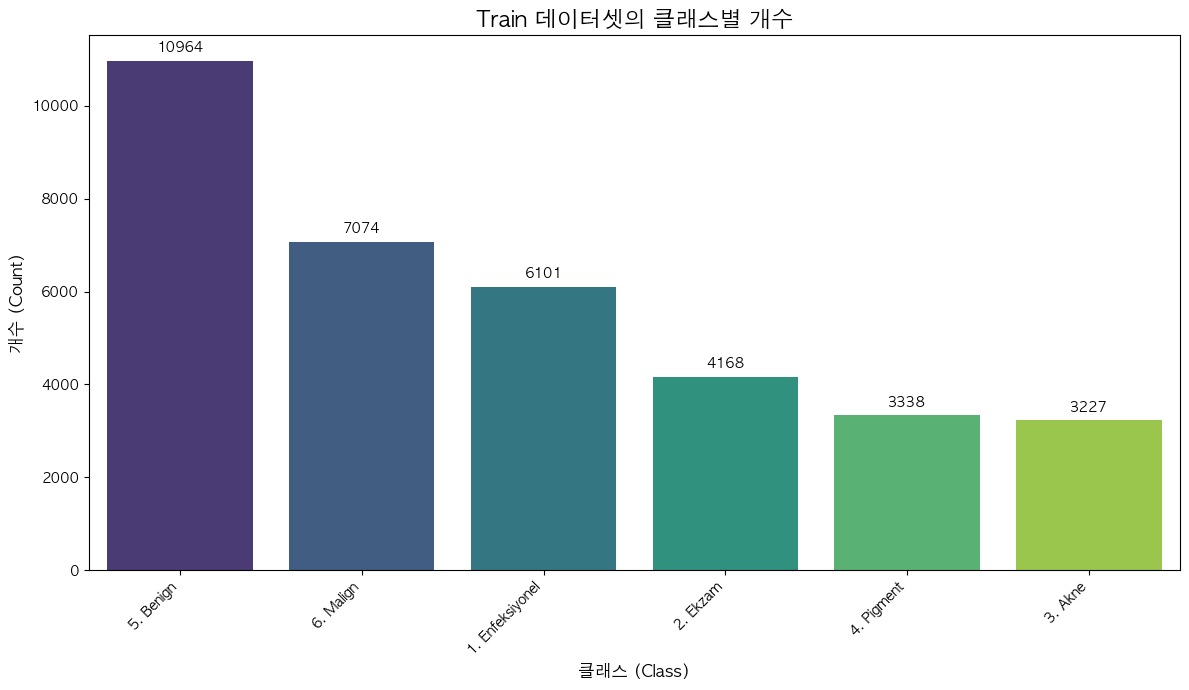

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class_counts=pd.Series({
    '5. Benign': 10964,
    '6. Malign': 7074,
    '1. Enfeksiyonel': 6101,
    '2. Ekzam': 4168,
    '4. Pigment': 3338,
    '3. Akne': 3227
})

plt.figure(figsize=(12, 7))
barplot = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
    
plt.title('Train 데이터셋의 클래스별 개수', fontsize=16)
plt.xlabel('클래스 (Class)', fontsize=12)
plt.ylabel('개수 (Count)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# 5. 그래프 레이아웃 최적화 및 출력
plt.tight_layout()
plt.show()

In [42]:
print("\n[Validation 데이터셋의 클래스별 개수]")
class_counts = val_df['label'].value_counts()
print(class_counts)


[Validation 데이터셋의 클래스별 개수]
label
5. Benign          1019
6. Malign           831
1. Enfeksiyonel     160
4. Pigment          111
3. Akne              79
2. Ekzama            75
Name: count, dtype: int64


/var/folders/sm/g93q316j7pd7kfn7fbtq91rw0000gp/T/ipykernel_8266/2792326604.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


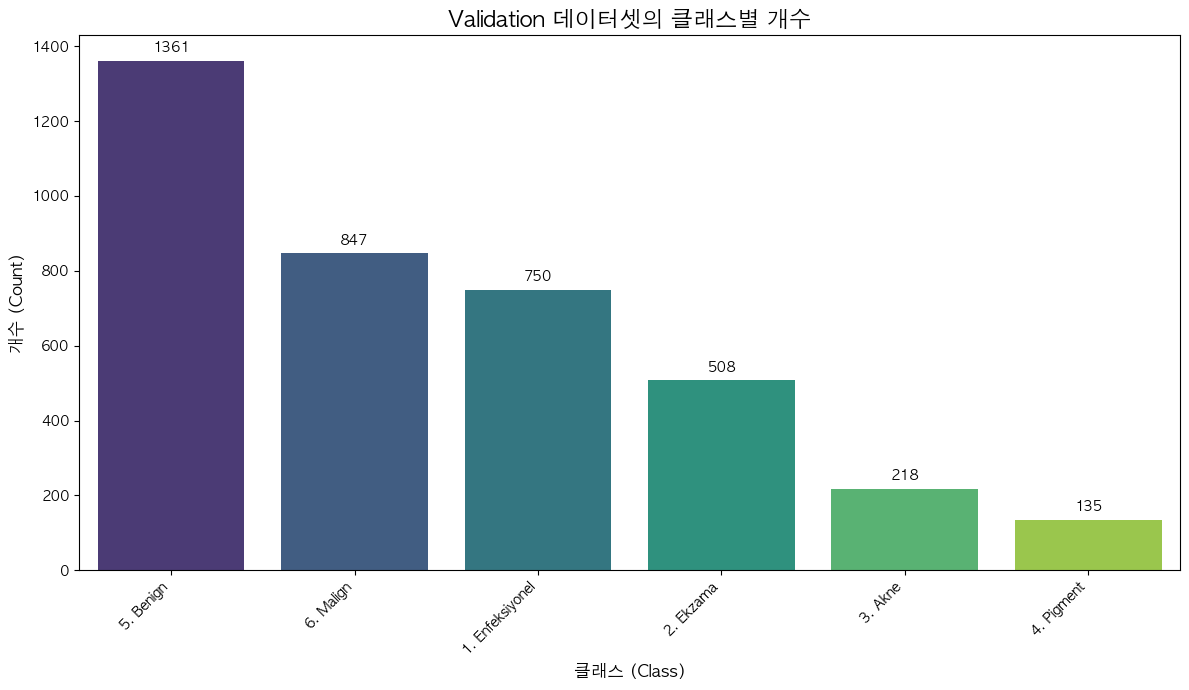

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class_counts=pd.Series({
    '5. Benign': 1361,
    '6. Malign': 847,
    '1. Enfeksiyonel': 750,
    '2. Ekzama': 508,
    '3. Akne': 218,
    '4. Pigment': 135
})

plt.figure(figsize=(12, 7))
barplot = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
    
plt.title('Validation 데이터셋의 클래스별 개수', fontsize=16)
plt.xlabel('클래스 (Class)', fontsize=12)
plt.ylabel('개수 (Count)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# 5. 그래프 레이아웃 최적화 및 출력
plt.tight_layout()
plt.show()

In [44]:
print("\n[Test 데이터셋의 클래스별 개수]")
class_counts = test_df['label'].value_counts()
print(class_counts)


[Test 데이터셋의 클래스별 개수]
label
5. Benign          1022
6. Malign           833
1. Enfeksiyonel     127
4. Pigment          112
2. Ekzama            84
3. Akne              69
Name: count, dtype: int64


In [45]:
#중복 lesion_id 찾기
import os
import hashlib
from tqdm import tqdm
from collections import defaultdict

# --- 기본 경로 설정 ---
base_dir = 'kaggle'
partitions = ['train', 'val', 'test']

# --- 데이터 저장을 위한 변수 ---
# key: 이미지 해시, value: 해당 이미지가 처음 발견된 파일 경로
hash_to_path = {}

# key: 이미지 해시, value: [누수된 파일 경로1, 누수된 파일 경로2, ...]
# 데이터 누수: 동일한 이미지가 둘 이상의 파티션에서 발견되는 경우
leaked_files = defaultdict(list)

# --- 전체 파일 탐색 및 누수 검사 ---
print("파일을 탐색하며 파티션 간 데이터 누수를 확인합니다...")

for partition in partitions:
    partition_path = os.path.join(base_dir, partition)
    if not os.path.isdir(partition_path):
        continue

    # 클래스 폴더 순회 (예: 1. Enfeksiyonel, 2. Ekzama 등)
    for class_name in os.listdir(partition_path):
        class_dir = os.path.join(partition_path, class_name)
        if not os.path.isdir(class_dir):
            continue

        # 이미지 파일 순회
        image_files = os.listdir(class_dir)
        for img_file in tqdm(image_files, desc=f"Scanning {partition}/{class_name}", leave=False):
            img_path = os.path.join(class_dir, img_file)
            
            # 이미지 파일의 해시값 계산
            with open(img_path, 'rb') as f:
                img_hash = hashlib.md5(f.read()).hexdigest()

            # 해시 충돌 확인
            if img_hash in hash_to_path:
                # 이전에 등록된 이미지가 있다면, 경로를 가져옴
                original_path = hash_to_path[img_hash]
                
                # 현재 파티션과 원본 파티션이 다른지 확인 (데이터 누수 조건)
                original_partition = original_path.split(os.sep)[1]
                if original_partition != partition:
                    # 누수 발생! leaked_files에 정보 추가
                    
                    # original_path가 아직 추가 안됐다면 추가
                    if original_path not in leaked_files[img_hash]:
                        leaked_files[img_hash].append(original_path)
                    
                    # 현재 경로 추가
                    leaked_files[img_hash].append(img_path)
            else:
                # 처음 보는 이미지라면 해시와 경로를 등록
                hash_to_path[img_hash] = img_path

print("\n탐색 완료!")

# --- 결과 출력 ---
if not leaked_files:
    print("✅ 파티션 간 데이터 누수가 발견되지 않았습니다.")
else:
    print(f"\n🚨 총 {len(leaked_files)}개의 이미지에서 파티션 간 데이터 누수가 발견되었습니다.")
    print("--------------------------------------------------")
    
    count = 0
    for img_hash, paths in leaked_files.items():
        if count < 5: # 예시로 5개 그룹만 출력
            print(f"\n[Leak Group] Hash: {img_hash}")
            unique_paths = sorted(list(set(paths))) # 중복 경로 제거 후 정렬
            for path in unique_paths:
                print(f" - {path}")
        count += 1

# `leaked_files` 변수에 모든 누수 정보가 사전(dictionary) 형태로 저장되어 있습니다.
# 이제 이 변수를 사용하여 누수된 파일들을 삭제하거나 옮기는 등의 후속 작업을 할 수 있습니다.

파일을 탐색하며 파티션 간 데이터 누수를 확인합니다...



탐색 완료!

🚨 총 8개의 이미지에서 파티션 간 데이터 누수가 발견되었습니다.
--------------------------------------------------

[Leak Group] Hash: 3547cff5adc40381d36a341a73590f93
 - kaggle/train/3. Akne/acne-077-v2__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.JPG
 - kaggle/val/3. Akne/acne-077-v2__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.JPG

[Leak Group] Hash: 0cb2454e24174c021be3508504c98c14
 - kaggle/train/3. Akne/1.png
 - kaggle/val/3. Akne/362f516bc2be4f01904fb2950eb700f411.png

[Leak Group] Hash: 2442ed1720fb6dfabe0013dcbb17a3f6
 - kaggle/train/3. Akne/3.JPG
 - kaggle/val/3. Akne/1821.JPG

[Leak Group] Hash: fdd0ebdb61a24fba74cccc40bd9d4b83
 - kaggle/test/3. Akne/301Acne_comedonal2.jpg
 - kaggle/train/3. Akne/acne vulgaris118.jpg

[Leak Group] Hash: f65c5eb1cb2155bee800b39fe2931b97
 - kaggle/test/3. Akne/303-1Acne_pustules_Carlos1.jpg
 - kaggle/train/3. Akne/acne vulgaris112.jpg


Train 개수: 29814
Val 개수: 2275
Test 개수: 2245

:막대_차트: 셋 간 중복 이미지 수 (해시 기준)
:반복: Train :양방향_화살표: Val 중복: 97장
:반복: Val :양방향_화살표: Test 중복: 0장
:반복: Train :양방향_화살표: Test 중복: 93장
:반복: Train :양방향_화살표: Val :양방향_화살표: Test 중복 (세 셋 모두 포함): 0장


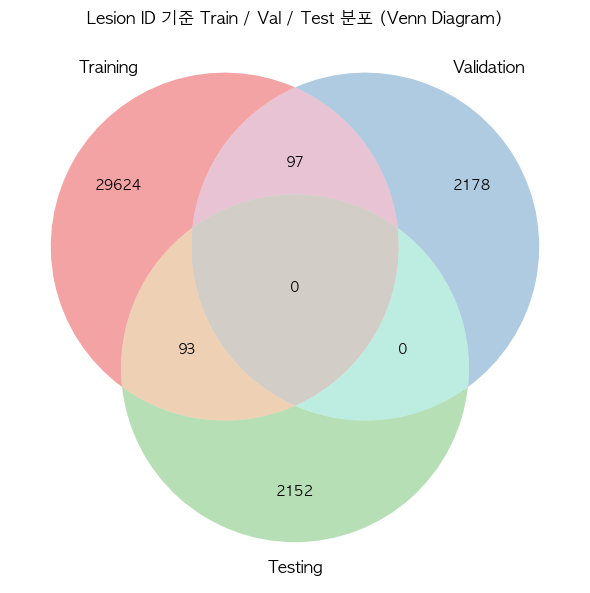

In [62]:
import os
from pathlib import Path
import hashlib
import matplotlib.pyplot as plt
from matplotlib_venn import venn3_unweighted
# :흰색_확인_표시: macOS에서 한글 깨짐 방지용 설정
plt.rcParams['font.family'] = 'AppleGothic'
# :흰색_확인_표시: 해시 계산 함수 (MD5 기준)
def compute_image_hash(image_path):
    with open(image_path, 'rb') as f:
        return hashlib.md5(f.read()).hexdigest()
# :흰색_확인_표시: 데이터 경로 설정
base_dir = Path("kaggle")  # 데이터 루트 폴더
splits = ["train", "val", "test"]
hash_sets = {"train": set(), "val": set(), "test": set()}
# :흰색_확인_표시: 각 split별 이미지 해시값 수집
for split in splits:  
    image_dir = base_dir / split
    for img_path in image_dir.rglob("*.jpg"):
        img_hash = compute_image_hash(img_path)
        hash_sets[split].add(img_hash)
# :흰색_확인_표시: 리스트 변환
list_train = list(hash_sets["train"])
list_val = list(hash_sets["val"])
list_test = list(hash_sets["test"])
# :흰색_확인_표시: 셋 간 크기 출력
print("Train 개수:", len(set(list_train)))
print("Val 개수:", len(set(list_val)))
print("Test 개수:", len(set(list_test)))
# :흰색_확인_표시: 교집합 정보 출력
overlap_train_val = len(set(list_train) & set(list_val))
overlap_val_test = len(set(list_val) & set(list_test))
overlap_train_test = len(set(list_train) & set(list_test))
overlap_all_three = len(set(list_train) & set(list_val) & set(list_test))
print(f"\n:막대_차트: 셋 간 중복 이미지 수 (해시 기준)")
print(f":반복: Train :양방향_화살표: Val 중복: {overlap_train_val}장")
print(f":반복: Val :양방향_화살표: Test 중복: {overlap_val_test}장")
print(f":반복: Train :양방향_화살표: Test 중복: {overlap_train_test}장")
print(f":반복: Train :양방향_화살표: Val :양방향_화살표: Test 중복 (세 셋 모두 포함): {overlap_all_three}장")
# :흰색_확인_표시: Venn 다이어그램 시각화
plt.figure(figsize=(6, 6))
venn3_unweighted(
    [set(list_train), set(list_val), set(list_test)],
    set_labels=("Training", "Validation", "Testing"),
    set_colors=("#E41A1C", "#377EB8", "#4DAF4A")
)
plt.title("Lesion ID 기준 Train / Val / Test 분포 (Venn Diagram)")
plt.tight_layout()
plt.show()

In [70]:
import os
import hashlib
from pathlib import Path
from collections import defaultdict
import shutil

# --- 1. 초기 설정 및 데이터 수집 ---
print("--- 1. 데이터 수집 및 중복 탐지 시작 ---")
base_dir = Path("kaggle")
hash_to_paths = defaultdict(list)

for partition in ["train", "val", "test"]:
    partition_path = base_dir / partition
    if not partition_path.is_dir(): continue
    print(f"'{partition}' 파티션 스캔 중...")
    for img_path in partition_path.rglob("*.jpg"):
        with open(img_path, 'rb') as f:
            img_hash = hashlib.md5(f.read()).hexdigest()
            hash_to_paths[img_hash].append(img_path)

duplicate_hashes = {h for h, paths in hash_to_paths.items() if len(paths) > 1}

if not duplicate_hashes:
    print("\n✅ 중복된 이미지가 없습니다. 작업을 종료합니다.")
else:
    print(f"\n🚨 총 {len(duplicate_hashes)}개의 이미지에서 중복이 발견되었습니다.")
    print("--- 2. 중복 해결 작업 시작 ---")

    # --- 2. 중복 해결 로직 ---
    for h in duplicate_hashes:
        paths = hash_to_paths[h]
        partitions_involved = {p.parts[1] for p in paths}

        # Case 1: 파티션 간 데이터 유출 (train, val, test 간 중복)
        if len(partitions_involved) > 1:
            print(f"\n[유출 해결] Hash: {h[:10]}... ({partitions_involved})")
            train_path_exists = None
            other_paths = []
            for p in paths:
                if 'train' in p.parts:
                    train_path_exists = p
                else:
                    other_paths.append(p)
            
            if train_path_exists:
                for p_to_delete in other_paths:
                    p_to_delete.unlink()
                    print(f"  - [삭제] {p_to_delete}")
            else:
                source_path = other_paths[0]
                class_folder = source_path.parent.name
                dest_dir = base_dir / 'train' / class_folder
                dest_dir.mkdir(parents=True, exist_ok=True)
                dest_path = dest_dir / source_path.name
                shutil.move(source_path, dest_path)
                print(f"  - [이동] {source_path} -> {dest_path}")
                for p_to_delete in other_paths[1:]:
                    p_to_delete.unlink()
                    print(f"  - [삭제] {p_to_delete}")
        
        # Case 2: 한 파티션 내에서의 중복 (train, val, 또는 test 각각의 내부 중복)
        else:
            partition_name = partitions_involved.pop()
            print(f"\n[{partition_name} 내 중복 해결] Hash: {h[:10]}...")
            # 첫 번째 파일은 남기고 나머지 중복본들을 삭제
            for p_to_delete in paths[1:]:
                p_to_delete.unlink()
                print(f"  - [삭제] {p_to_delete}")

    print("\n✅ 모든 중복 해결 작업이 완료되었습니다.")

--- 1. 데이터 수집 및 중복 탐지 시작 ---
'train' 파티션 스캔 중...
'val' 파티션 스캔 중...
'test' 파티션 스캔 중...

🚨 총 4871개의 이미지에서 중복이 발견되었습니다.
--- 2. 중복 해결 작업 시작 ---

[train 내 중복 해결] Hash: 88e37017b2...
  - [삭제] kaggle/train/1. Enfeksiyonel/v-tinea-foot-webs-75.jpg

[train 내 중복 해결] Hash: a1f2202b74...
  - [삭제] kaggle/train/1. Enfeksiyonel/t-perleche-14.jpg

[train 내 중복 해결] Hash: 5213f39858...
  - [삭제] kaggle/train/2. Ekzama/5IMG004.jpg

[train 내 중복 해결] Hash: 33c8bf6eec...
  - [삭제] kaggle/train/1. Enfeksiyonel/t-herpes-zoster-20.jpg

[train 내 중복 해결] Hash: 8b7543b307...
  - [삭제] kaggle/train/1. Enfeksiyonel/herpes-buttocks-2.jpg

[train 내 중복 해결] Hash: 6fd71b2bc1...
  - [삭제] kaggle/train/1. Enfeksiyonel/t-MonialisisIMG005-GP3.jpg

[train 내 중복 해결] Hash: f2d4ebf8e0...
  - [삭제] kaggle/train/1. Enfeksiyonel/t-herpes-zoster-155.jpg

[train 내 중복 해결] Hash: 2ae47f0ae0...
  - [삭제] kaggle/train/1. Enfeksiyonel/v-herpes-cutaneous-44.jpg

[train 내 중복 해결] Hash: 47e055cbaa...
  - [삭제] kaggle/train/2. Ekzama/t-eczema-foot-62.jpg

Train 개수: 29814
Val 개수: 2178
Test 개수: 2152

:막대_차트: 셋 간 중복 이미지 수 (해시 기준)
:반복: Train :양방향_화살표: Val 중복: 0장
:반복: Val :양방향_화살표: Test 중복: 0장
:반복: Train :양방향_화살표: Test 중복: 0장
:반복: Train :양방향_화살표: Val :양방향_화살표: Test 중복 (세 셋 모두 포함): 0장


/Users/skku_aws13/Desktop/preproject/Corrected-Skin-Image-Datasets/kaggle/.venv/lib/python3.12/site-packages/matplotlib_venn/_util.py:62: UserWarning: venn3_unweighted is deprecated. Use venn3 with the appropriate layout_algorithm instead.
  warnings.warn(


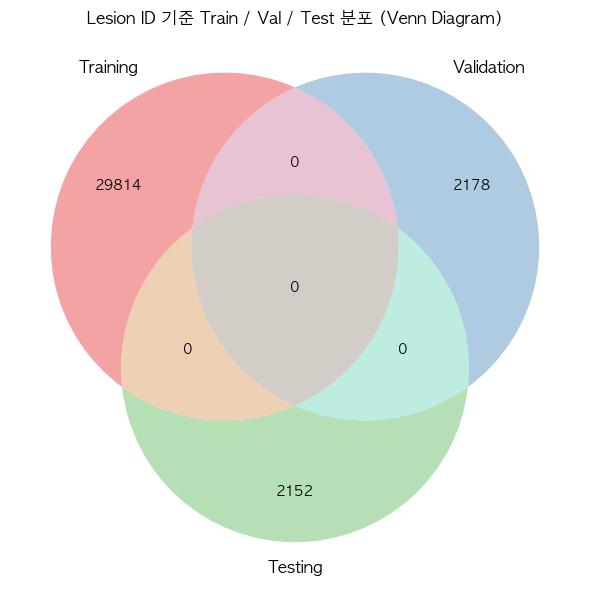

In [71]:
import os
from pathlib import Path
import hashlib
import matplotlib.pyplot as plt
from matplotlib_venn import venn3_unweighted
# :흰색_확인_표시: macOS에서 한글 깨짐 방지용 설정
plt.rcParams['font.family'] = 'AppleGothic'
# :흰색_확인_표시: 해시 계산 함수 (MD5 기준)
def compute_image_hash(image_path):
    with open(image_path, 'rb') as f:
        return hashlib.md5(f.read()).hexdigest()
# :흰색_확인_표시: 데이터 경로 설정
base_dir = Path("kaggle")  # 데이터 루트 폴더
splits = ["train", "val", "test"]
hash_sets = {"train": set(), "val": set(), "test": set()}
# :흰색_확인_표시: 각 split별 이미지 해시값 수집
for split in splits:  
    image_dir = base_dir / split
    for img_path in image_dir.rglob("*.jpg"):
        img_hash = compute_image_hash(img_path)
        hash_sets[split].add(img_hash)
# :흰색_확인_표시: 리스트 변환
list_train = list(hash_sets["train"])
list_val = list(hash_sets["val"])
list_test = list(hash_sets["test"])
# :흰색_확인_표시: 셋 간 크기 출력
print("Train 개수:", len(set(list_train)))
print("Val 개수:", len(set(list_val)))
print("Test 개수:", len(set(list_test)))
# :흰색_확인_표시: 교집합 정보 출력
overlap_train_val = len(set(list_train) & set(list_val))
overlap_val_test = len(set(list_val) & set(list_test))
overlap_train_test = len(set(list_train) & set(list_test))
overlap_all_three = len(set(list_train) & set(list_val) & set(list_test))
print(f"\n:막대_차트: 셋 간 중복 이미지 수 (해시 기준)")
print(f":반복: Train :양방향_화살표: Val 중복: {overlap_train_val}장")
print(f":반복: Val :양방향_화살표: Test 중복: {overlap_val_test}장")
print(f":반복: Train :양방향_화살표: Test 중복: {overlap_train_test}장")
print(f":반복: Train :양방향_화살표: Val :양방향_화살표: Test 중복 (세 셋 모두 포함): {overlap_all_three}장")
# :흰색_확인_표시: Venn 다이어그램 시각화
plt.figure(figsize=(6, 6))
venn3_unweighted(
    [set(list_train), set(list_val), set(list_test)],
    set_labels=("Training", "Validation", "Testing"),
    set_colors=("#E41A1C", "#377EB8", "#4DAF4A")
)
plt.title("Lesion ID 기준 Train / Val / Test 분포 (Venn Diagram)")
plt.tight_layout()
plt.show()


--- 3. 유출 해결 후 데이터 검증 ---


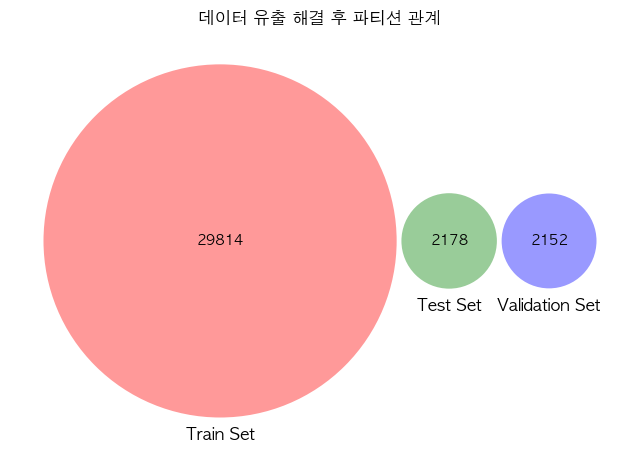

In [72]:
# --- 3. 검증 단계 ---
import matplotlib.pyplot as plt
from matplotlib_venn import venn3_unweighted

print("\n--- 3. 유출 해결 후 데이터 검증 ---")
hash_sets_after = {"train": set(), "val": set(), "test": set()}
for split in ["train", "val", "test"]:
    partition_path = base_dir / split
    if not partition_path.is_dir(): continue
    for img_path in partition_path.rglob("*.jpg"):
        with open(img_path, 'rb') as f:
            img_hash = hashlib.md5(f.read()).hexdigest()
            hash_sets_after[split].add(img_hash)

# :아래쪽_화살표: 벤 다이어그램으로 시각화하여 확인
plt.figure(figsize=(8, 8))
plt.rcParams['font.family'] = 'AppleGothic' # macOS 기준, Windows는 'Malgun Gothic'
venn3(
    [hash_sets_after['train'], hash_sets_after['val'], hash_sets_after['test']],
    set_labels=('Train Set', 'Test Set', 'Validation Set')
)
plt.title("데이터 유출 해결 후 파티션 관계")
plt.show()